- mglearn에서는 머신러닝 공부에 사용하는 여러 dataset을 제공
- 붓꽃의 품종을 분류하는 모델을 만들어보기

### scikit-learn

#### 1. 붓꽃의 품종 분류

#### (1) 데이터 적재

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
# from sklearn.datasets import load_breast_cancer
iris_dataset = load_iris()
# cancer = load_breast_cancer

In [3]:
print('iris_dataset의 키 : \n{}'.format(iris_dataset.keys()))

iris_dataset의 키 : 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print(iris_dataset.DESCR) # describe of dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
print(iris_dataset['DESCR'][:200] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive
...


In [7]:
# 예측하려믄 붓꽃 품종의 이름을 가지고 잇는 key = target_names

format("타깃의 이름:{}".format(iris_dataset['target_names']))

"타깃의 이름:['setosa' 'versicolor' 'virginica']"

In [8]:
# 특성을 설명하는 문자열 리스트 : feature_names
format("특성의 이름:{}".format(iris_dataset['feature_names']))

"특성의 이름:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']"

In [10]:
print("data의 크기 : {}".format(iris_dataset['data'].shape))

data의 크기 : (150, 4)


- 해당 데이터는 150개의 붓꽃 데이터를 가지고있으며 각 붓꽃마다 4개의 측정치를 가지고 있음
- 각 아이템은 샘플이라 하고 속성은 특성이라고 부름
- 그러므로 data 배열의 크기는 150*4

In [11]:
print("data의 처음 다섯 행:\n{}".format(iris_dataset['data'][:5]))

# 꽃받침의 길이, 꽃받침의 폭, 꽃잎의 길이, 꽃잎의 폭

data의 처음 다섯 행:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [12]:
# target 배열 : 샘플 붓꽃의 품종을 담은 numpy배열

print("data의 타입 : {}".format(type(iris_dataset['target'])))

data의 타입 : <class 'numpy.ndarray'>


In [14]:
print("data의 타입 : {}".format(iris_dataset['target'].shape))

data의 타입 : (150,)


In [15]:
print("타깃:\n{}".format(iris_dataset['target']))
# 0: setosa, 1 : versicolor, 2: virginica

타깃:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


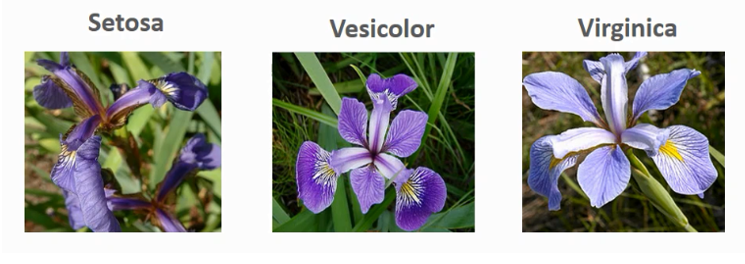

#### (2) 훈련 데이터와 테스트 데이터
- 머신러닝 모델을 만들 때 사용하는 훈련 데이터와 모델이 얼마나 잘 작동하는지 측정하는 테스트데이터로 나뉨
- scikit-learn은 데이터셋을 섞어서 나눠주는 train_test_split 함수 제공(훈련세트:75%, 테스트세트:25%)
- 데이터는 X, 레이블은 y로 표기
- 이는 수학에서 함수의 입력을 x, 출력을 y로 하는 표준 공식에서 유래
- 수학의 표기 방식을 따르되 데이터는 2차원 배열이므로 X를, 타깃은 1차원배열(벡터)이므로 y를 사용

In [16]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test,y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

- train 데이터와, test 데이터로 나누기 전에 무작위로 섞어주지 않으면 순서대로 나누어 지기 때문에 y_test(테스트레이블)
  값이 모두 2가 나오게 된다
- 세 클래스 중 하나만 포함한 테스트 세트를 사용하면 모델이 얼마나 잘 일반화 되었는지 알 수 없다.
- 테스트 세트는 모든 클래스의 데이터를 포함하도록 잘 섞어야 한다.
- random_state = 0 은 이 함수를 여러번 실행해도 같은 랜덤값이 리턴 된다.

In [20]:
print("X_train 크기:{}".format(X_train.shape))
print("y_train 크기:{}".format(y_train.shape))

X_train 크기:(112, 4)
y_train 크기:(112,)


In [21]:
print("X_test 크기:{}".format(X_test.shape))
print("y_test 크기:{}".format(y_test.shape))

X_test 크기:(38, 4)
y_test 크기:(38,)


#### (3) 데이터 살펴보기
- 머신러닝 모델을 만들기 전에 머신러닝 없이도 풀 수 있는 문제가 아닌지, 혹은 필요한 정보가
  누락되어 있는지 데이터를 조사해 보는것이 좋다.
- 실제 데이터에는 일관성이 없거나 이상한 값이 들어가 있는 경우가 종종 있다.

** 산점도 행렬을 통해 데이터의 특성을 찾아보자 **

In [22]:
# X_train 데이터를 사용해서 데이터프레임을 만든다
iris_dataframe = pd.DataFrame(X_train,columns = iris_dataset.feature_names)

In [23]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

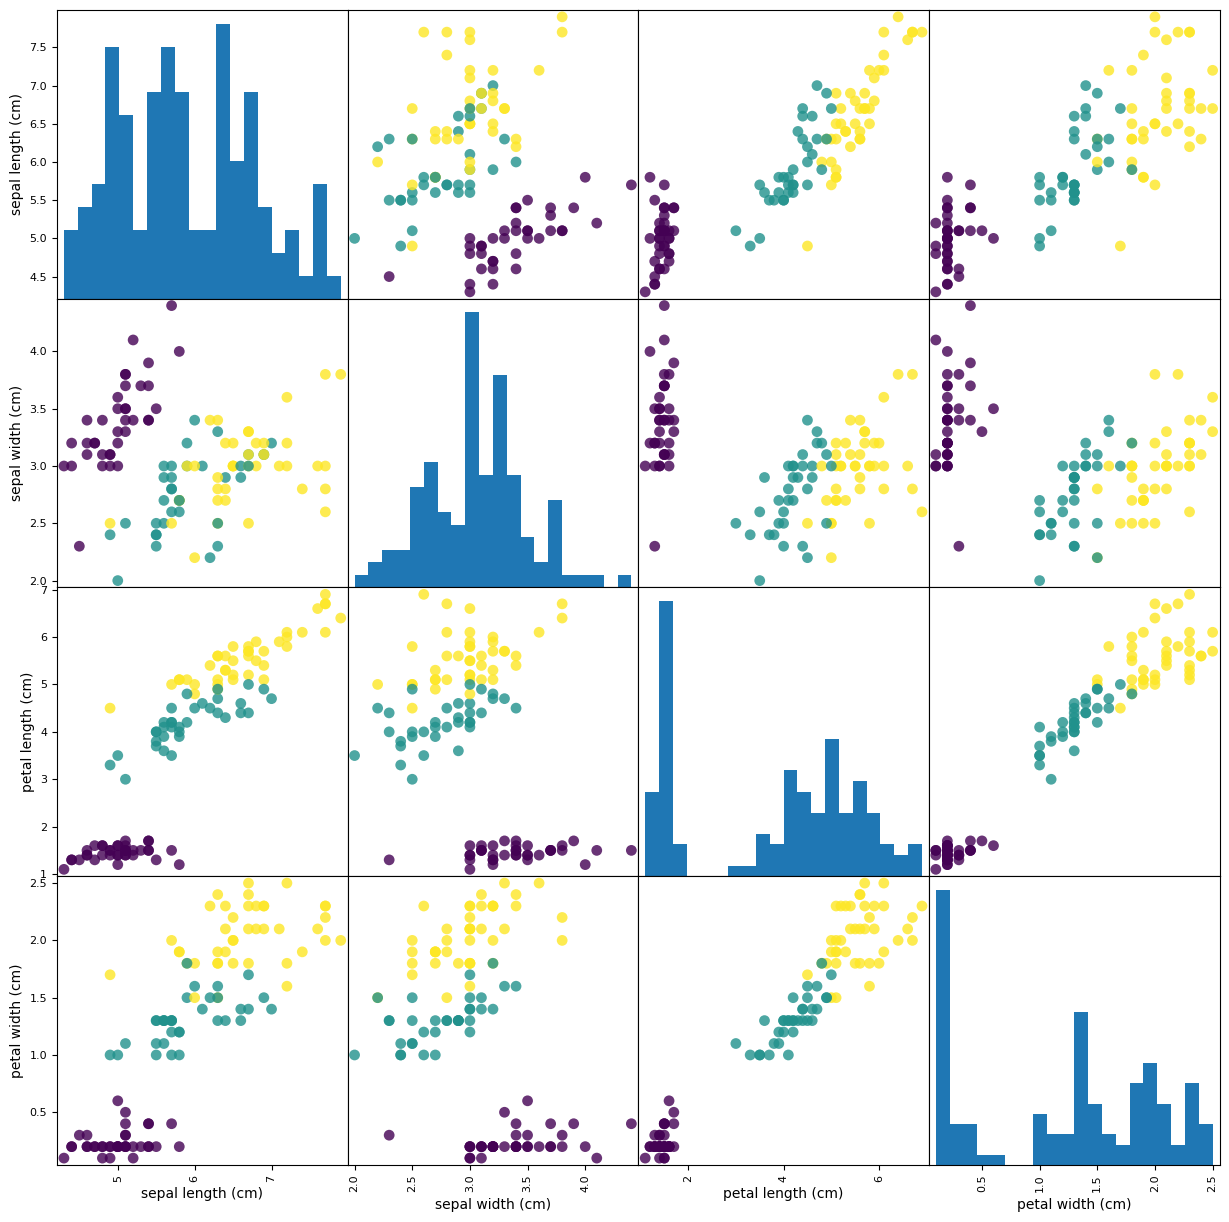

In [25]:
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15),
                          marker='o', hist_kwds={'bins':20},s=60, alpha=.8)

#### (4) K-최근접 이웃(k-nearest neighbors,k-nn) 알고리즘을 이용한 머신러닝
- 훈련데이터를 통해 모델이 만들어지고 새로운 데이터가 들어오면 가까운 훈련 데이터 포인트를 찾아 분류한다
- scikit-learn의 모든 머신러닝 모델은 Estimator라는 파이썬 클래스로 각각 구현되어 있다.
- k-최근접 이웃 분류 알고리즘은 neighbors 모듈 아래 KNeighborsClassifier 클래스에 구현되어 있다.
- 모델을 사용하기 위해 클래스로부터 객체를 만들고 paramiter를 설정한다.
- 가장 중요한 이웃의 개수를 1로 지정하고 모델을 만들어 보자

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

- 훈련 데이터 셋으로부터 모델을 만들기 위해 fit 사용

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

#### (5) 예측하기
- 위에서 만든 모델을 사용해서 새 데이터에 대한 예측을 만들 수 있다.
- 야생에서 꽃받침의 길이는 3cm, 폭은 4.2cm, 꽃입의 길이는 0.8cm, 폭은 0.4cm인 붓꽃을 찾았다고 가정하고
  이 붓꽃의 품종을 찾아보자
- 측정값은 numpy 배열로 만드는데, 하나의 붓꽃 샘플(1)에 4가지 특성(4)이 있으므로 1 by 4 배열을 만들어야 한다.
- 붓꽃 하나의 측정갑은 2차원 numpy 배열에 행으로 들어가므로, scikit-learn은 항상 데이터가 2차원 배열일 것으로 예상

In [32]:
X_new = np.array([[3,4.2 ,0.8,0.4]])
X_new

array([[3. , 4.2, 0.8, 0.4]])

In [33]:
print("X_new.shape:{}".format(X_new.shape))

X_new.shape:(1, 4)


In [34]:
prediction = knn.predict(X_new)
print("예측:{}".format(prediction))

예측:[0]


In [35]:
print("예측한 붓꽃의 이름 : {}".format(iris_dataset['target_names'][prediction]))

예측한 붓꽃의 이름 : ['setosa']


- 하나의 입력, 특성을 가진 값이 아니기 때문에 벡터형태로 나타내면 에러

In [36]:
# X_new2 = np.array([3,4.2,0.8,0.4])   <- 벡터 형태이기 때문에 에러가 남
X_new2 = np.array([[3,4.2,0.8,0.4]])
X_new2prediction = knn.predict(X_new2)
prediction

array([0])

#### (6) 모델 평가

In [38]:
y_pred = knn.predict(X_test)
# 만들어진 학습모델은 가지고 테스트 데이터의 붓꽃품종을 예측

In [39]:
y_pred  # 테스트 데이터의 예측 값

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [40]:
y_pred == y_test   # 예측 품종과 실제 품종이 같으면 true

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [41]:
print("테스트 세트의 정확도 : {:.4f}%".format(np.mean(y_pred==y_test) * 100))

테스트 세트의 정확도 : 97.3684%


In [42]:
print("테스트 세트의 정확도 : {:.4f}%".format(knn.score(X_test,y_test)*100))

테스트 세트의 정확도 : 97.3684%


In [43]:
from sklearn import metrics

In [44]:
print("테스트 세트의 정확도 : {:.4f}%".format(metrics.accuracy_score(y_test,y_pred)*100))

테스트 세트의 정확도 : 97.3684%
